# import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and processing

In [2]:
# loading the csv data to a pandas dataframe
gold_data=pd.read_csv("gld_price_data.csv")

In [3]:
# print first five rows in the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the numberv of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation=gold_data.corr()

<AxesSubplot:>

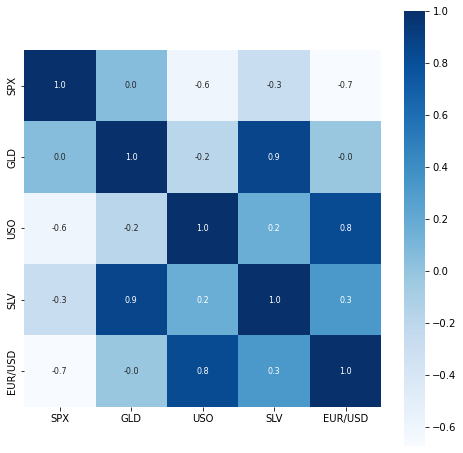

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, 
            annot_kws={"size":8}, cmap="Blues")

# cbar is colourbar on right side
# square format
# fmt .1f indicates the number of decimal points
# annotations are the name of columns
# annotation size
# cmap is colour map

We find that silver is directly correlated with gold price and USO is slightly negatively correlated

In [11]:
# correlation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Yash Agarwal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

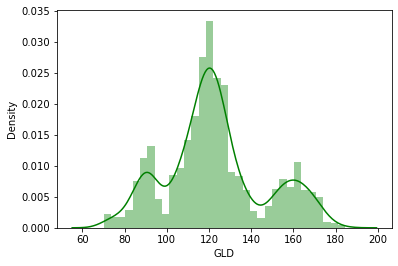

In [12]:
# checking the distribution of gold price 
sns.distplot(gold_data["GLD"], color="green")

# Splitting the Features and Target

In [13]:
x=gold_data.drop(["Date","GLD"], axis=1)
# whenever you are dropping a column you need to mention axis=1
# whenever you are dropping a row you need to mention axis=0

In [14]:
y=gold_data["GLD"]

In [15]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# splitting into Training and Test Data

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
regressor=RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
# prediction on test day
y_pred=regressor.predict(x_test)

In [21]:
print(y_pred)

[168.61949953  81.97070004 116.07160041 127.75690063 120.73050125
 154.94679744 150.26129851 126.03750083 117.54809876 125.92240097
 116.77940093 170.92190078 141.86979907 167.89209823 115.23509987
 117.64430019 139.63600263 169.86040019 159.69460363 156.43019916
 155.06360007 125.32070026 175.91739985 157.45370347 125.20500036
  93.65880013  77.13590021 120.44240022 119.01929907 167.51139926
  88.37140068 125.25809963  91.06400086 117.62780026 121.22929938
 136.34520153 115.52260106 115.26830047 147.02699984 107.36070085
 104.53670263  87.11729776 126.53420021 118.27730042 152.46809863
 119.55949979 108.42599997 108.1625979   93.21060075 127.18839748
  75.11090016 113.63379899 121.62000009 110.98209945 118.94729884
 120.91689926 158.87140097 166.84120144 146.9529968   85.89059875
  94.23850059  86.82579903  90.61240013 119.00730071 126.43820068
 127.50300038 168.81760046 122.28919928 117.34909876  98.81820045
 168.5078011  143.36799795 132.76310286 121.38280213 120.87709933
 119.66320

In [22]:
# R squared error
error_score = metrics.r2_score(y_test,y_pred)

In [23]:
print("R squared error:", error_score)

R squared error: 0.9893722295162386


In [24]:
#MSE
mse=metrics.mean_squared_error(y_test,y_pred)

In [25]:
print("mean squared error:", mse)

mean squared error: 5.605548468098095


# compare the actual values and predicted values in a plot


In [26]:
y_test=list(y_test)

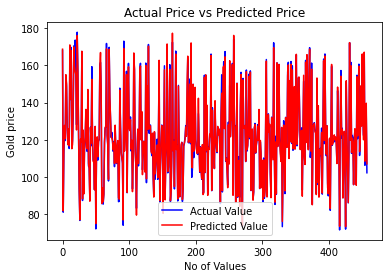

In [27]:
plt.plot(y_test, color="blue", label="Actual Value")
plt.plot(y_pred, color="red", label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("No of Values")
plt.ylabel("Gold price")
plt.legend()
plt.show()